# Исследование надежности заемщиков.
___
# Research of reliability of borrowers.

**Описание проекта**

Кредитный отдел банка отправил задачу. Необходимо определить, влият семейное положение и количество детей клиента на факт погашения кредита в срок или нет.

В рамках поставленной задачи требуется проверить следующие гипотезы:
1. Наличие и количество детей взаимосвязано с возвратом кредита в срок.
2. Семейное положение взаимосвязано с возвратом кредита в срок.
3. Уровень дохода взаимосвязан с возвратом кредита в срок.
4. Цели кредита взаимосвязаны с возвратом кредита в срок.
___
**Description of the project**

The credit department of the bank sent the task. It is necessary to determine whether the marital status and the number of children of the client will affect the fact of repaying the loan on time or not.

As part of the task, it is required to test the following hypotheses:
1. The presence and number of children is interconnected with the repayment of the loan on time.
2. Marital status is interconnected with the repayment of the loan on time.
3. The level of income is interconnected with the repayment of the loan on time.
4. The objectives of the loan are interconnected with the repayment of the loan on time.

### Шаг 1. Обзор данных
___
### Step 1. Data Review

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


**Описание данных**
- **children** — количество детей в семье
- **days_employed** — общий трудовой стаж в днях
- **dob_years** — возраст клиента в годах
- **education** — уровень образования клиента
- **education_id** — идентификатор уровня образования
- **family_status** — семейное положение
- **family_status_id** — идентификатор семейного положения
- **gender** — пол клиента
- **income_type** — тип занятости
- **debt** — имел ли задолженность по возврату кредитов
- **total_income** — ежемесячный доход
- **purpose** — цель получения кредита
___
**Data Description**
- **children** - number of children in the family
- **days_employed** — total work experience in days
- **dob_years** — client's age in years
- **education** — the level of education of the client
- **education_id** — education level identifier
- **family_status** - marital status
- **family_status_id** — marital status identifier
- **gender** — gender of the client
- **income_type** — employment type
- **debt** — whether he had a debt to repay loans
- **total_income** — monthly income
- **purpose** — the purpose of the loan

**Выводы**

В каждой строке таблицы — персональные данные клиентов кредитного отдела банка. Часть колонок предсоставляют нам социодемографические данные. Другая часть - данные о непосредственно кредите, а именно о цели получения кредита, информация о задолженности по возврату кредитов в прошлом.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, обнаруживаются стилевые расхождения, которые приводят к распространению дубликатов.

Чтобы двигаться дальше, нужно устранить проблемы в данных.
___
**Conclusions**

Each line of the table contains the personal data of the clients of the bank's credit department. Some of the columns provide us with socio-demographic data. The other part is data about the loan itself, namely the purpose of obtaining a loan, information about debts for repayment of loans in the past.

Preliminarily, it can be argued that there is enough data to test hypotheses. But there are gaps in the data, style discrepancies are found, which lead to the spread of duplicates.

To move forward, you need to fix problems in the data.

### Шаг 2.2 Заполнение пропусков
___
### Step 2.2 Fill in the gaps

In [6]:
print('Количество пропусков по столбцам в процентном соотношении:')
data.isna().mean()*100

Количество пропусков по столбцам в процентном соотношении:


children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

Пропуски обнаружены в столбцах days_employed и total_income.
___
Gaps were found in the days_employed and total_income columns.

- Пропуски данных в столбцах **days_employed** и **total_income** составляют одинаковую долю, также они идентичны количественно. Отсюда можно сделать вывод об их общей природе, и, вероятно, они сформировались в силу систематического невнесения/непопадания данных, для уточнения необходимо обратиться к источнику выгрузки. 

- Их процент слишком велик для того, чтобы удалять строки, иначе будет потерян значимый массив данных.

- Их необходимо заполнить. Заполнить стоит медианными значениями, чтобы минимально повлиять на результаты. Таким образом мы избегаем удаления строк с потенциально важной информацией. В столбце **days_employed** необходимо преобразовать значения, так как имеются количественные данные с отрицательным значением, что не может соответствовать действительности.
___
- Data gaps in the **days_employed** and **total_income** columns are the same proportion, and they are also quantitatively identical. From this we can conclude that they have a common nature, and probably they were formed due to the systematic non-inclusion / non-inclusion of data; for clarification, it is necessary to refer to the source of the unloading.

- Their percentage is too large to delete rows, otherwise a significant amount of data will be lost.

- They must be filled. It is worth filling in the median values ​​in order to minimally affect the results. This way we avoid deleting lines with potentially important information. The **days_employed** column needs to be converted because there is quantitative data with a negative value, which cannot be true.

### Шаг 2.1 Проверка данных на аномалии и исправления.
___
### Step 2.1 Checking data for anomalies and corrections.

In [7]:
data["days_employed"] = data["days_employed"].abs()
data["days_employed"].isna().sum()

2174

Отрицательные значения могли быть результатом ошибки внесения данных. 
- Было произведена инверсия отрицательных значений
___
Negative values could be the result of a data entry error.
- Negative values have been inverted

### Шаг 2.2 Проверка данных на аномалии и исправления.
___
### Step 2.2 Checking data for anomalies and corrections.

Кроме отрицательных значений в столбце **days_employed** наблюдаются нереалистично большие значения, которые необходимо изменить, в ином случае данные будут недоказательными.
___
In addition to negative values in the **days_employed** column, there are unrealistically large values that need to be changed, otherwise the data will be inconclusive.

Для начала посмотрим на графике разброс значений.
___
First, let's look at the spread of values on the graph.

Text(0.5, 1.0, 'Разброс значений days_employed')

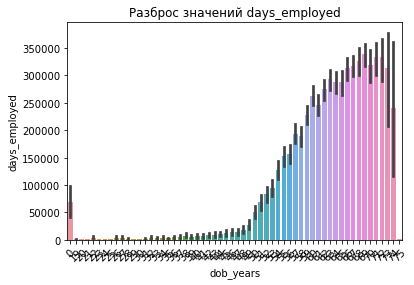

In [8]:
sns.barplot(x= 'dob_years', y="days_employed", data=data)
plt.xticks(rotation=45)
plt.title('Разброс значений days_employed')


In [9]:
data['dob_years'].max()

75

Максимальный возраст равен 75 годам. Соответственно необходимо посчитать максимально возможный трудовой стаж с 18 лет.
___
The maximum age is 75 years. Accordingly, it is necessary to calculate the maximum possible length of service from 18 years.

In [10]:
(data['dob_years'].max() - 18) * 365

20805

Максимально возможный трудовой стаж равен 20805 рабочих дней. Выясним количество аномально высоких значений стажа.
___
The maximum possible length of service is 20805 working days. Find out the number of abnormally high values of experience.

In [11]:
data[data['days_employed'] > 20805].count()

children            3445
days_employed       3445
dob_years           3445
education           3445
education_id        3445
family_status       3445
family_status_id    3445
gender              3445
income_type         3445
debt                3445
total_income        3445
purpose             3445
dtype: int64

In [12]:
data.loc[data['days_employed'] > 20805, 'days_employed'] = data['days_employed'].median()

In [13]:
data['days_employed'].median()

2194.220566878695

In [14]:
data['days_employed'].max()

18388.949900568383

In [15]:
data[data['days_employed'] > 20805].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Все аномально высокие значения заменены медианными.
___
All abnormally high values are replaced by medians.

In [16]:
data_days_employed_median = data["days_employed"].median()
data["days_employed"] = data["days_employed"].fillna(data_days_employed_median)

Все пустые значения также заменены на медианные.
___
All empty values are also replaced with medians.

In [17]:
data[data['dob_years'] < 18].count()

children            101
days_employed       101
dob_years           101
education           101
education_id        101
family_status       101
family_status_id    101
gender              101
income_type         101
debt                101
total_income         91
purpose             101
dtype: int64

Доля значений менее 18 лет мала, потому можно удалить данные строки.
___
The proportion of values less than 18 years old is small, so you can delete these rows.

In [18]:
data = data.drop(np.where(data['dob_years'] < 18)[0])

Удалены строки с возрастом менее 18 лет.
___
Removed rows less than 18 years old.

Далее необходимо избавиться от отрицательных значений в столбце **children**.
___
Next, you need to get rid of the negative values in the **children** column.

In [19]:
data[data['children'] < 0].count()

children            47
days_employed       47
dob_years           47
education           47
education_id        47
family_status       47
family_status_id    47
gender              47
income_type         47
debt                47
total_income        44
purpose             47
dtype: int64

In [20]:
data['children'].min()

-1

Наиболее малое значение - -1. Вероятно их наличие - ошибка ввода. Поменяем их на положительные значения.
___
The smallest value is -1. Probably their presence is an input error. Let's change them to positive values.

In [21]:
data.loc[data['children'] == -1, 'children'] = 1

In [22]:
data[data['children'] < 0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [23]:
data['children'].max()

20

In [24]:
data[data['children'] == 20].count()

children            75
days_employed       75
dob_years           75
education           75
education_id        75
family_status       75
family_status_id    75
gender              75
income_type         75
debt                75
total_income        66
purpose             75
dtype: int64

In [25]:
data[data['children'] > 5].count()

children            75
days_employed       75
dob_years           75
education           75
education_id        75
family_status       75
family_status_id    75
gender              75
income_type         75
debt                75
total_income        66
purpose             75
dtype: int64

Количество детей, равное 20 - аномалия. Доля строк мала, можно удалить данные.
___
The number of children equal to 20 is an anomaly. The proportion of rows is small, you can delete the data.

In [26]:
data = data.drop(np.where(data['children'] > 5)[0])

In [27]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,2194.220567,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [28]:
data[data['children'] > 5].count()

children            74
days_employed       74
dob_years           74
education           74
education_id        74
family_status       74
family_status_id    74
gender              74
income_type         74
debt                74
total_income        66
purpose             74
dtype: int64

Столбец **children** очищен от аномалий.
___
**children** column cleared of anomalies.

### Шаг 2.3. Изменение типов данных.
___
### Step 2.3. Changing data types.

In [29]:
data_total_income_median = data["total_income"].median()
data_total_income_median

145011.70929552132

In [30]:
data["total_income"] = data["total_income"].fillna(data_total_income_median)

In [31]:
data["total_income"].isna().sum()

0

In [32]:
data['total_income'] = data['total_income'].astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21349 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21349 non-null  int64  
 1   days_employed     21349 non-null  float64
 2   dob_years         21349 non-null  int64  
 3   education         21349 non-null  object 
 4   education_id      21349 non-null  int64  
 5   family_status     21349 non-null  object 
 6   family_status_id  21349 non-null  int64  
 7   gender            21349 non-null  object 
 8   income_type       21349 non-null  object 
 9   debt              21349 non-null  int64  
 10  total_income      21349 non-null  int32  
 11  purpose           21349 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.0+ MB


- Пропуски были заполнены медианными значениями;
- Вещественный тип данных в столбце total_income был заменен на целочисленный с помощью метода astype().
___
- Gaps were filled with median values;
- The float data type in the total_income column has been changed to integer using the astype() method.

### Шаг 2.4. Удаление дубликатов.
___
### Step 2.4. Removing duplicates.

Для поиска и удаления дубликатов будем использовать методы **duplicated()** и **drop_duplicates()**.
___
To find and remove duplicates, we will use the **duplicated()** and **drop_duplicates()** methods.

In [34]:
data.duplicated().sum()

53

In [35]:
data = data.drop_duplicates().reset_index(drop=True)

In [36]:
data.duplicated().sum()

0

Для поиска неявных дубликатов найдем уникальные значения с помощью метода **value_counts()**, которые впоследствии, в случае нежелательных повторов устраним.
___
To search for implicit duplicates, we will find unique values using the **value_counts()** method, which we will subsequently eliminate in case of unwanted repetitions.

In [37]:
data['education'].value_counts()

среднее                13605
высшее                  4657
СРЕДНЕЕ                  769
Среднее                  707
неоконченное высшее      660
ВЫСШЕЕ                   270
Высшее                   265
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       28
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [38]:
data['education'] = data['education'].str.lower()

In [39]:
data['education'].value_counts()

среднее                15081
высшее                  5192
неоконченное высшее      735
начальное                282
ученая степень             6
Name: education, dtype: int64

Вопрос регистра решен приведением всех переменных к одному регистру строчных букв.
___
The case issue is resolved by converting all variables to the same case of lowercase letters.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.
___
### Step 2.5. Formation of additional dataframes of dictionaries, decomposition of the original dataframe.

In [40]:
education_df = data[['education_id', 'education']].copy()
education_df = education_df.drop_duplicates().reset_index(drop=True)
education_df

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [41]:
family_status_df = data[['family_status_id', 'family_status']].copy()
family_status_df = family_status_df.drop_duplicates().reset_index(drop=True)
family_status_df

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [42]:
data = data.drop(columns=['education', 'family_status'])

In [43]:
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,2194.220567,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


Были созданы новые датафреймы — те самые «словари», к которым можно обращаться по идентификатору.
___
New dataframes were created - the same "dictionaries" that can be accessed by identifier.

### Шаг 2.6. Категоризация дохода.
___
### Step 2.6. income categorization.

Произведем категоризацию дохода, создав на основании диапазонов, указанных ниже, столбец **total_income_category** с категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.
___
Let's categorize income by creating a **total_income_category** column with categories based on the ranges below:
- 0–30000 - 'E';
- 30001–50000 - 'D';
- 50001–200000 - 'C';
- 200001–1000000 - 'B';
- 1000001 and above - 'A'.

In [44]:
data.loc[data['total_income'] > 1000000, 'total_income_category'] = 'A'
data.loc[(data['total_income'] >= 200001) & (data['total_income'] <= 1000000), 'total_income_category'] = 'B'
data.loc[(data['total_income'] >= 50001) & (data['total_income'] <= 200000), 'total_income_category'] = 'C'
data.loc[(data['total_income'] >= 30001) & (data['total_income'] <= 50000), 'total_income_category'] = 'D'
data.loc[data['total_income'] <= 30000, 'total_income_category'] = 'E'

In [45]:
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,2194.220567,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.
___
### Step 2.7. Categorization of loan purposes.

С помощью функции создадим столбец purpose_category, в который войдут следующие категории:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.
___
Using the function, we will create a purpose_category column, which will include the following categories:
- 'car operations',
- 'real estate transactions',
- 'holding a wedding',
- 'getting an education'.

In [46]:
def purpose_cat(cell):
    if 'жил' in cell or 'недвиж' in cell:
        return 'операции с недвижимостью'
    elif 'свадьб' in cell:
        return 'проведение свадьбы'
    elif 'образ' in cell:
        return 'получение образования'
    elif 'автомоб' in cell:
        return 'операции с автомобилем'
data['purpose_category'] = data['purpose'].apply(purpose_cat)
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,2194.220567,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Ответы на вопросы.
___
### Answers on questions.

##### Вопрос 1:
___
##### Question 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок?
___
Is there a relationship between the number of children and loan repayment on time?

<AxesSubplot:xlabel='children', ylabel='debt'>

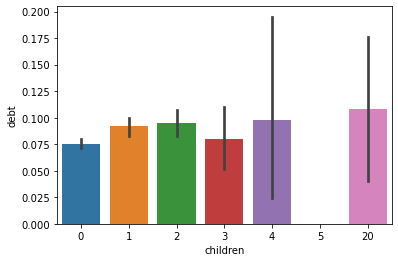

In [47]:
sns.barplot(x = 'children', y = 'debt', data=data)

##### Вывод 1:
___
##### Output 1:

Как видно из графика клиенты с 1,2 и 4 детьми чаще других имели задолженности по выплатам.
___
As can be seen from the graph, clients with 1,2 and 4 children more often than others had arrears in payments.

##### Вопрос 2:
___
##### Question 2:

Есть ли зависимость между cемейным положением и возвратом кредита в срок?
___
Is there a relationship between marital status and loan repayment on time?

In [48]:
data = data.merge(family_status_df)

<AxesSubplot:xlabel='family_status', ylabel='debt'>

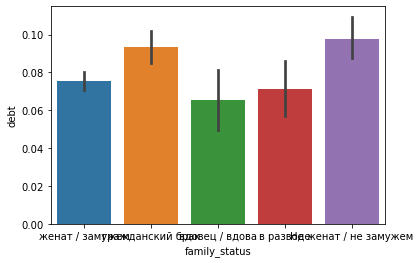

In [49]:
sns.barplot(x = 'family_status', y = 'debt', data=data)

##### Вывод 2:
___
##### Conclusion 2:

На графике видно, что клиенты в гражданском браке, и клиенты не в браке обладают наибольшей тенденцией к наличию факта несвоевременных выплат.
___
The graph shows that clients in a civil marriage, and clients not in marriage, have the greatest tendency to have the fact of late payments.

##### Вопрос 3:
___
##### Question 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
___
Is there a relationship between income level and loan repayment on time?

<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

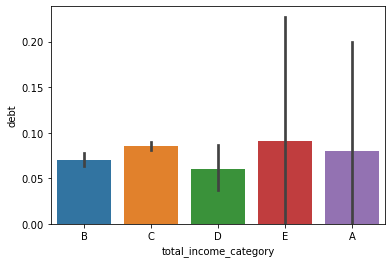

In [50]:
sns.barplot(x = 'total_income_category', y = 'debt', data=data)

##### Вывод 3:
___
##### Conclusion 3:

На графике видно, что клиенты из категорий E, C, A обладают наибольшей тенденцией к наличию факта несвоевременных выплат.
___
The graph shows that customers from categories E, C, A have the greatest tendency to have the fact of late payments.

Как было обозначено ранее, данные категории подразумевают доход, указанный в нижеприведенных пунктах:
- 0–30000 — 'E';
- 50001–200000 — 'C';
- 1000001 и выше — 'A'.
___
As indicated earlier, these categories imply the income specified in the paragraphs below:
- 0–30000 - 'E';
- 50001–200000 - 'C';
- 1000001 and above - 'A'.

##### Вопрос 4:
___
##### Question 4:

Есть ли зависимость между целью кредита и его возврата в срок?
___
Is there a relationship between the purpose of the loan and its repayment on time?

<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

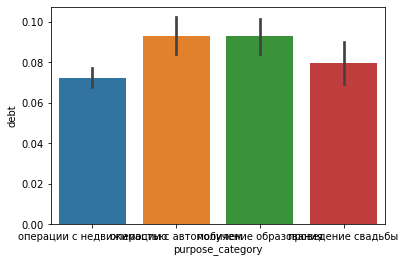

In [51]:
sns.barplot(x = 'purpose_category', y = 'debt', data=data)

##### Вывод 4:
___
##### Conclusion 4:

На графике видно, что цели покупок клиентов в виде операций с автомобилем и получении образования связаны с наиболее высоким риском задолженностей.
___
The graph shows that the goals of customer purchases in the form of car transactions and education are associated with the highest risk of debt.

## Общий вывод:
___
## General conclusion:

Результатом исследования стали закономерные выводы:
- клиенты с 1,2 и 4 детьми чаще других имели задолженности по выплатам;
- клиенты в гражданском браке, и клиенты не в браке обладают наибольшей тенденцией к наличию факта несвоевременных выплат;
- клиенты с доходом до 30000 р/мес, от 50001 р/мес до 200000 р/мес и более 1000000 р/мес обладают наибольшей тенденцией к наличию факта несвоевременных выплат;
- цели покупок клиентов в виде операций с автомобилем и получении образования связаны с наиболее высоким риском задолженностей.
___
The result of the study was the logical conclusions:
- clients with 1,2 and 4 children more often than others had arrears in payments;
- clients in a civil marriage, and clients not in marriage, have the greatest tendency to have the fact of late payments;
- customers with an income of up to 30,000 rubles/month, from 50,001 rubles/month to 200,000 rubles/month and more than 1,000,000 rubles/month have the greatest tendency to have the fact of untimely payments;
- Purchasing goals of customers in the form of car transactions and education are associated with the highest risk of debt.